# Ensemble Project

### Domain:

**_Medicine_**

### Context :

### Attribute Information:

* name - ASCII subject name and recording number
* MDVP:Fo(Hz) - Average vocal fundamental frequency
* MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
* MDVP:Flo(Hz) - Minimum vocal fundamental frequency 
* MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
* MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
* NHR,HNR - Two measures of ratio of noise to tonal components in the voice
* status - Health status of the subject (one) - Parkinson's, (zero) - healthy
* RPDE,D2 - Two nonlinear dynamical complexity measures
* DFA - Signal fractal scaling exponent
* spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

### Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
from os import system

## Exploratory Data Aanalysis [EDA]

**Load and Read Data as a Dataframe**

In [2]:
# importing and reading 'Data - Parkinsins' as CSV under the name data and printing first 5 rows 

data = pd.read_csv('Data - Parkinsons')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
# Printing the number of Rows & Columns in the data

rows_count, columns_count = data.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 195
Total Number of columns : 24


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

**Comments :**

* From the above we could see that each Coulmn has all the entries for the attributes
* From the data we could see Target Column name is **Status**
* For the easy usage will rearrage the STatus column to the front

In [5]:
#Moving status column to the last

taregt_column = data['status']
data.drop(['status'], axis=1, inplace = True)
data['status'] = taregt_column
data.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [6]:
rows_count, columns_count = data.shape
print('Post Column Movement')
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Post Column Movement
Total Number of rows : 195
Total Number of columns : 24


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [8]:
data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
status                int64
dtype: object

In [9]:
data.isnull().values.any()

False

In [10]:
data.mean()

MDVP:Fo(Hz)         154.228641
MDVP:Fhi(Hz)        197.104918
MDVP:Flo(Hz)        116.324631
MDVP:Jitter(%)        0.006220
MDVP:Jitter(Abs)      0.000044
MDVP:RAP              0.003306
MDVP:PPQ              0.003446
Jitter:DDP            0.009920
MDVP:Shimmer          0.029709
MDVP:Shimmer(dB)      0.282251
Shimmer:APQ3          0.015664
Shimmer:APQ5          0.017878
MDVP:APQ              0.024081
Shimmer:DDA           0.046993
NHR                   0.024847
HNR                  21.885974
RPDE                  0.498536
DFA                   0.718099
spread1              -5.684397
spread2               0.226510
D2                    2.381826
PPE                   0.206552
status                0.753846
dtype: float64

In [11]:
data.median()

MDVP:Fo(Hz)         148.790000
MDVP:Fhi(Hz)        175.829000
MDVP:Flo(Hz)        104.315000
MDVP:Jitter(%)        0.004940
MDVP:Jitter(Abs)      0.000030
MDVP:RAP              0.002500
MDVP:PPQ              0.002690
Jitter:DDP            0.007490
MDVP:Shimmer          0.022970
MDVP:Shimmer(dB)      0.221000
Shimmer:APQ3          0.012790
Shimmer:APQ5          0.013470
MDVP:APQ              0.018260
Shimmer:DDA           0.038360
NHR                   0.011660
HNR                  22.085000
RPDE                  0.495954
DFA                   0.722254
spread1              -5.720868
spread2               0.218885
D2                    2.361532
PPE                   0.194052
status                1.000000
dtype: float64

In [12]:
data.mode()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,88.333,102.145,65.476,0.00369,0.00003,0.00169,0.00332,0.00507,0.01450,...,0.01567,0.00231,8.441,0.256570,0.574282,-7.964984,0.210279,1.423287,0.044539,1.0
1,phon_R01_S01_2,91.904,102.305,65.750,0.00694,NaN,NaN,NaN,NaN,0.01503,...,0.01898,0.00340,8.867,0.263654,0.582710,-7.777685,NaN,1.512275,0.056141,NaN
2,phon_R01_S01_3,95.056,107.715,65.782,0.00742,NaN,NaN,NaN,NaN,0.01608,...,0.02184,0.00420,9.449,0.276850,0.605417,-7.695734,NaN,1.544609,0.057610,NaN
3,phon_R01_S01_4,95.385,108.664,65.809,NaN,NaN,NaN,NaN,NaN,0.01725,...,0.03831,0.00476,10.489,0.296888,0.623731,-7.682587,NaN,1.743867,0.068501,NaN
4,phon_R01_S01_5,95.605,110.019,66.004,NaN,NaN,NaN,NaN,NaN,0.02293,...,0.04451,0.00479,11.744,0.305062,0.626710,-7.517934,NaN,1.765957,0.073581,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,243.439,565.740,231.848,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.775,0.665318,0.819521,-3.269487,NaN,3.184027,0.430788,NaN
191,phon_R01_S50_3,244.990,581.289,232.435,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30.940,0.671299,0.821364,-2.931070,NaN,3.274865,0.444774,NaN
192,phon_R01_S50_4,245.510,586.567,232.483,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,31.732,0.671378,0.823484,-2.929379,NaN,3.317586,0.454721,NaN
193,phon_R01_S50_5,252.455,588.518,237.303,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,32.684,0.677131,0.825069,-2.839756,NaN,3.413649,0.457533,NaN


In [13]:
data.status.value_counts()

1    147
0     48
Name: status, dtype: int64

**Understanding about the Data :**

* Status is the Target Column with value 1 & 0 to indicate how many people are infected and not
* Except Name and status other Attributes are all the Test measures which helps to identify/deduce the disease

### Univariate Ananlysis

Box Plot Of Frequency Variation


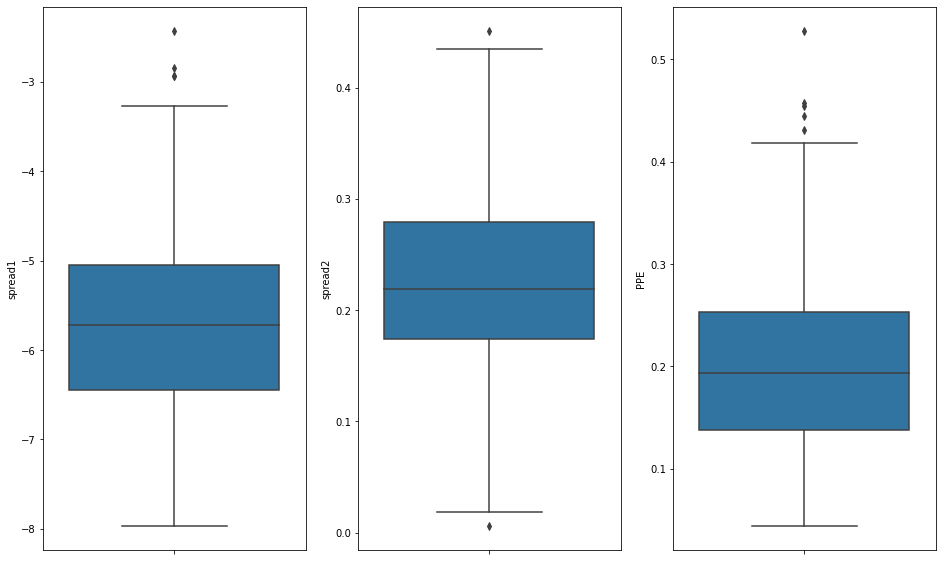

In [14]:
print('Box Plot Of Frequency Variation')
fig, ax = plt.subplots(1,3,figsize=(16,10)) 
sns.boxplot(x='spread1',data=data, ax=ax[0],orient='v') 
sns.boxplot(x='spread2',data=data, ax=ax[1],orient='v')
sns.boxplot(x='PPE',data=data,ax=ax[2],orient='v')

**Observations from Box Plot Of Frequency Variation:**

* All the three variations have outliers. 
* Decision trees should be able to handle outliers by default. 
* It is very unlikely that decision tree will create a leaf to isolate them


In [15]:
# dropping name column as this column is not much significant 
data = data.drop('name',axis=1)

Measures Of Vocal Fundamental Frequency


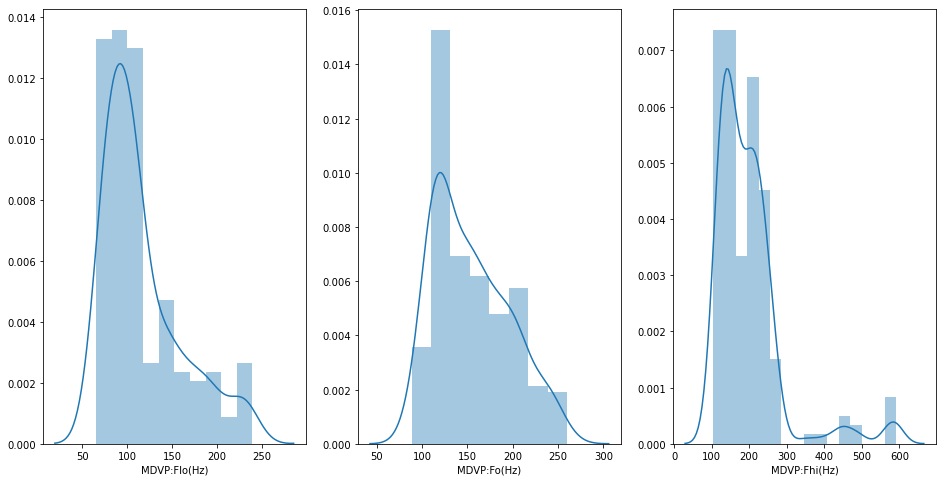

In [16]:
print('Measures Of Vocal Fundamental Frequency')
fig, ax = plt.subplots(1,3,figsize=(16,8)) 
sns.distplot(data['MDVP:Flo(Hz)'],ax=ax[0]) 
sns.distplot(data['MDVP:Fo(Hz)'],ax=ax[1]) 
sns.distplot(data['MDVP:Fhi(Hz)'],ax=ax[2])

**Observations from Measures Of Vocal Fundamental Frequency:**

* There is a positive skewness for minimum vocal fundemental frequency with more high values between 75Hz and 125Hhz.
* The average vocal frequency is almost normally distributed with more values ranging 115Hz and 130Hz.
* The high vocal frequency does not have any skewness, but population is hight at the right most tail

Measure Of Tonal Component Of Frequency In Voice


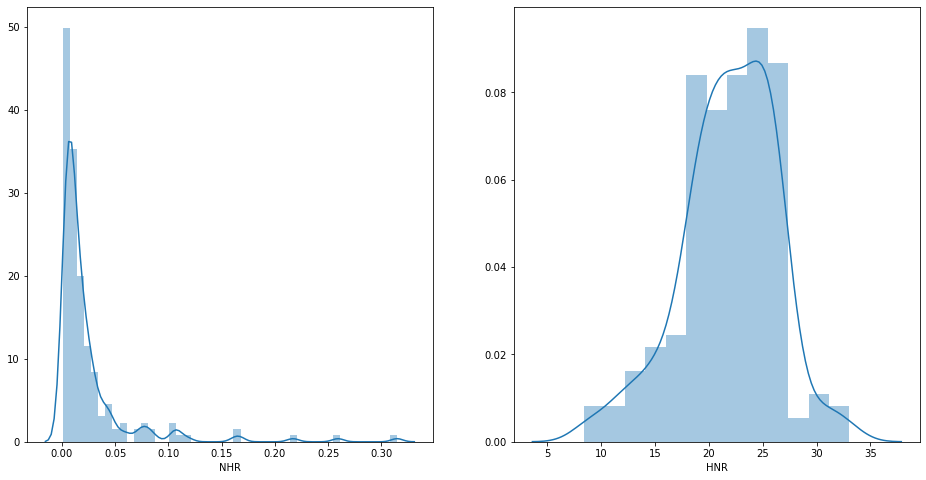

In [17]:
print('Measure Of Tonal Component Of Frequency In Voice')
fig, ax = plt.subplots(1,2,figsize=(16,8)) 
sns.distplot(data['NHR'],ax=ax[0]) 
sns.distplot(data['HNR'],ax=ax[1])

**Observations From Tonal Component Of Frequency In Voice :**

* The value NHR is right skewed for there are so many observations in the area, but they seem to be with very minimal values. 
* The maximum number of observations is between 0 to 0.04.
* The value HNR looks like normally distributed, but in a first look there seems to be a slight negative skewness

Measures Of Variation In Amplitude


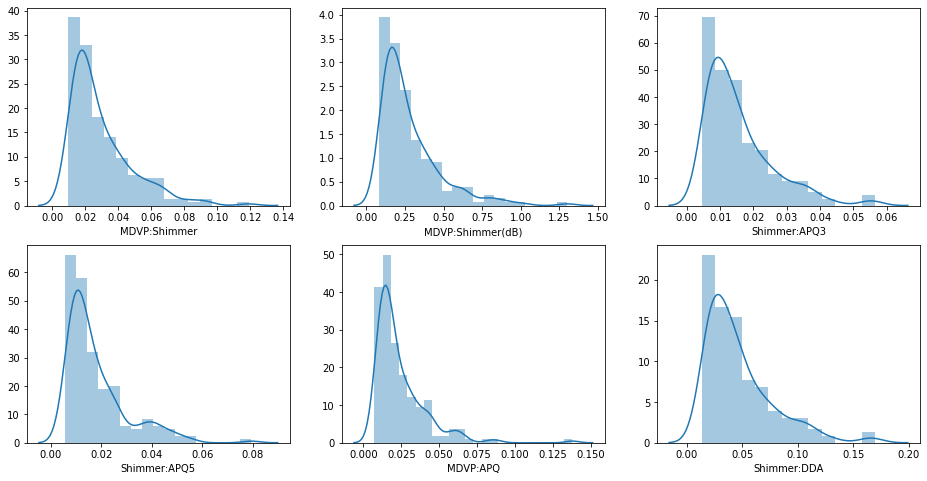

In [18]:
print('Measures Of Variation In Amplitude')
fig, ax = plt.subplots(2,3,figsize=(16,8)) 
sns.distplot(data['MDVP:Shimmer'],ax=ax[0,0]) 
sns.distplot(data['MDVP:Shimmer(dB)'],ax=ax[0,1]) 
sns.distplot(data['Shimmer:APQ3'],ax=ax[0,2]) 
sns.distplot(data['Shimmer:APQ5'],ax=ax[1,0]) 
sns.distplot(data['MDVP:APQ'],ax=ax[1,1]) 
sns.distplot(data['Shimmer:DDA'],ax=ax[1,2])

**Observation from the Measure Of Variations In Amplitude :**

* From the graphs we can observe that the measure of variation in amplitude is positively skewed

### Bivariate Ananlysis

Blue color Represent Parking status as 0
Green color Represent Parking status as 1


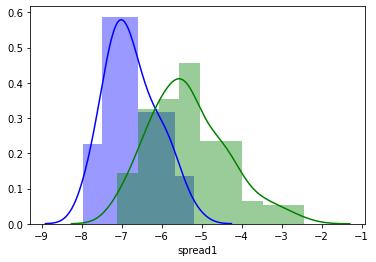

In [19]:
sns.distplot( data[data.status == 0]['spread1'], color = 'b')
sns.distplot( data[data.status == 1]['spread1'], color = 'g')
print('Blue color Represent Parking status as 0')
print('Green color Represent Parking status as 1')

**Observations :**

* Spread1 is normally distributed between person who have Parkinsons and who is normal.
* People who have spread1 between - 8.5 and -7.5 are more and they are normal.
* People whose spread1 is between -6.5 and -5 are having Parkinsons

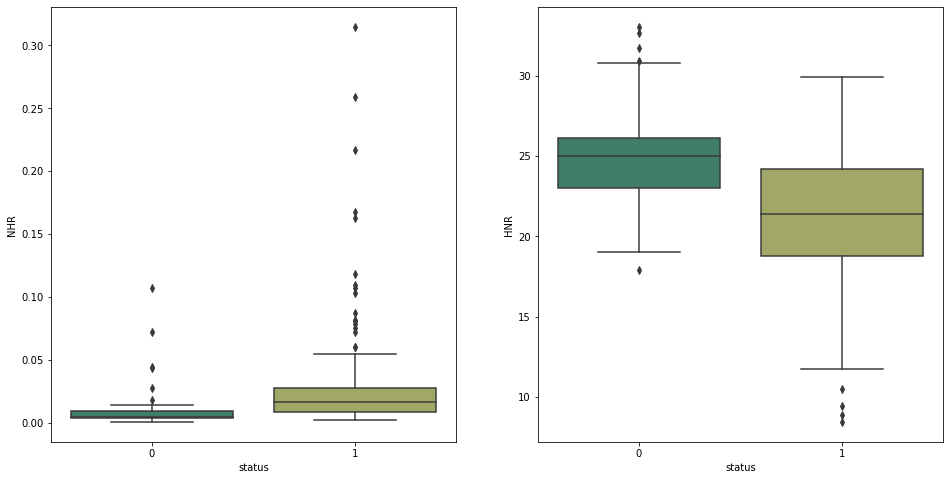

In [20]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='status',y='NHR',data=data,palette="gist_earth", ax=ax[0])
sns.boxplot(x='status',y='HNR',data=data,palette="gist_earth", ax=ax[1])

**Observation :**

* People who have Parkinson (Color=Orange Status=1) have higher levels of Noise to Harmonic ratio. 
* On Looking into the HNR ratio people who have Parkinsons have lower levels in the same.

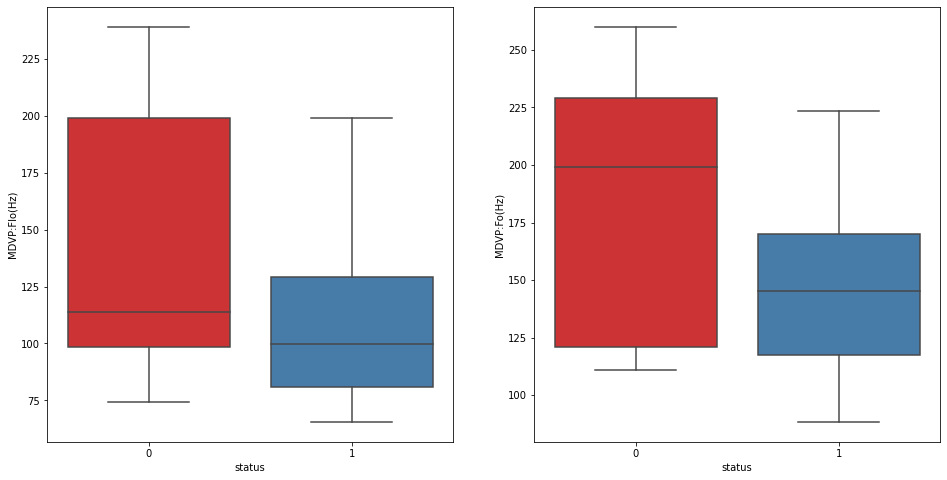

In [21]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='status',y='MDVP:Flo(Hz)',data=data,palette="Set1",ax=ax[0])
sns.boxplot(x='status',y='MDVP:Fo(Hz)',data=data,palette="Set1",ax=ax[1])

**Observations :**

* When we look the relationship between status and MDVP:Fo(Hz) we can see the median value is around 199 Hz for people who are normal.
* For people who are affected with Parkinsons the median value comes around 145 Hz
* SImilarly When we look the relationship between status and MDVP:Flo(Hz) we can see the median value is around 119 Hz for people who are normal.
* For people who are affected with Parkinsons the median value for the MCVP:Flo comes around 100 Hz

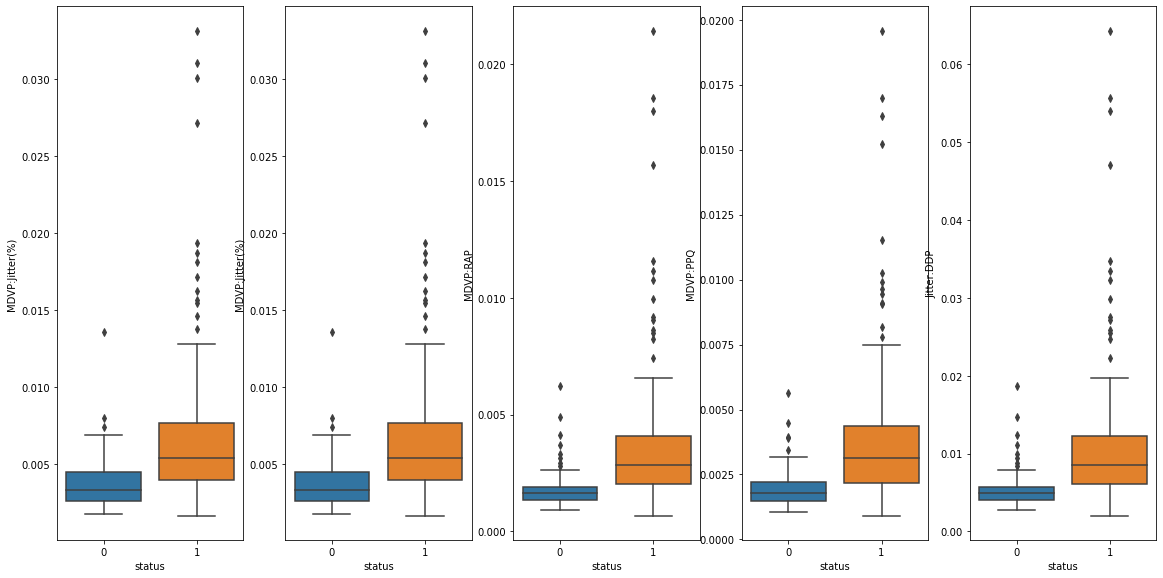

In [22]:
# For categorical predictors
cols = ["MDVP:Jitter(%)","MDVP:Jitter(%)","MDVP:RAP","MDVP:PPQ","Jitter:DDP"]
fig, axs = plt.subplots(ncols = 5,figsize=(16,8))
fig.tight_layout()
for i in range(0,len(cols)):
    sns.boxplot(x='status',y=cols[i],data=data, ax = axs[i])

**Observation :**

* People who are suffering with Parkinsons tend to have higher Jitter %. 
* It looks like if the values goes above 0.15 we can confirm the patient is having Parkinsons. 
* The variation of fundamental frequency is in a low range for people who is normal.

### Descriptive Analysis

#### Correlation Comparison With Heat Map

We can use heat map to find the correlations coefficient values. 
We will remove the less correlation coefficient columns. 
We can remove the irrelavant features it will minimize the accuracy of an algorithm.

It will be better if we take relavent features columns then we can achive to get good accuracy.

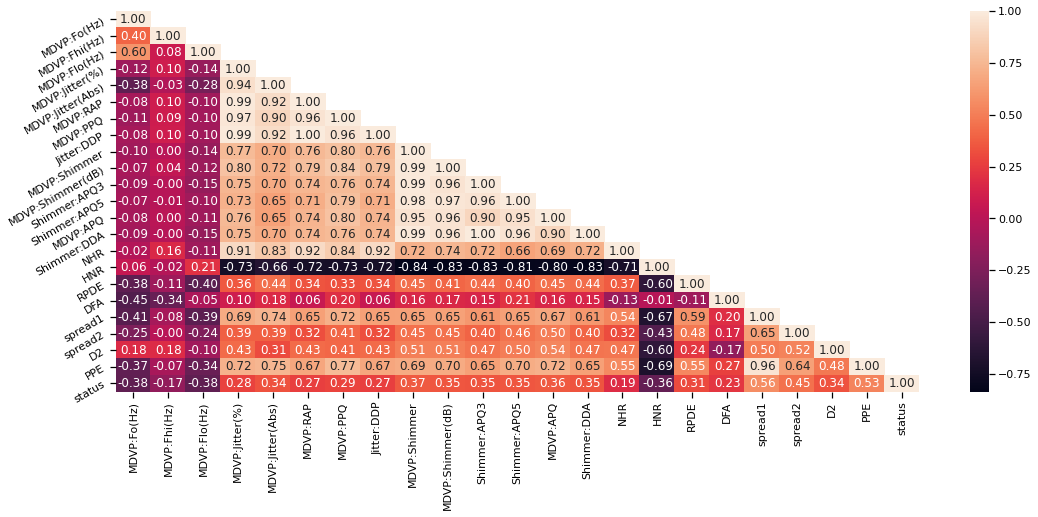

In [23]:
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(18,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

**Observations :**

* MDVP:Jitter(%) has a very high correlation with MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP
* MDVP:Shimmer has a very correlation with MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA this may be because they are related to each other. 
* This may be because multi-dimensinal voice programs analysis is closely related with these variables
* The target variable status has a weak positive corelation with spread1

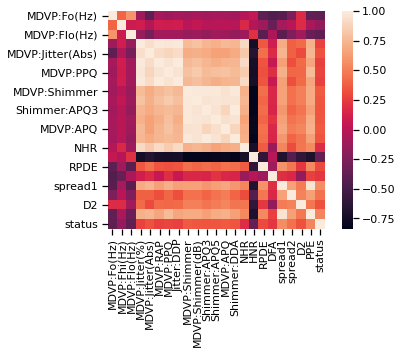

In [24]:
# Heatmap visulisation for each attribute coefficient correlation.
import seaborn as sb
corr_map=data.corr()
sb.heatmap(corr_map,square=True)

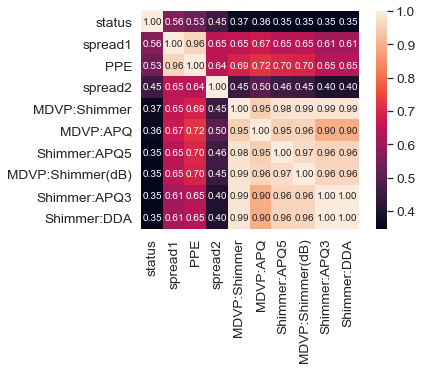

In [25]:
# Now visualise the heat map with correlation coefficient values for pair of attributes.
# K value means how many features required to see in heat map
# Assuming the K value
k=10

# finding the columns which related to output attribute and we are arranging from top coefficient correlation value to downwards.
cols=corr_map.nlargest(k,'status')['status'].index

# correlation coefficient values
coff_values=np.corrcoef(data[cols].values.T)
sb.set(font_scale=1.25)
sb.heatmap(coff_values,cbar=True,annot=True,square=True,fmt='.2f',
           annot_kws={'size': 10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

**Observations :**

* From The Above heatmap plot We got coerrelation coefficient values for each pair of values.
* This is visualized with only top 10 coefficient values.
* Now we need to print all the coefficient values in each attribute,later we can decide which attribute have relavant and irrelavant features.

In [26]:
# correlation coefficient values in each attributes.
correlation_values=data.corr()['status']
correlation_values.abs().sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

**Observation :**

* The Above correlation values in descending order, we have correaltion values in each attribute so we are going to drop from MDVP:RAP column to MDVP:Fhi(Hz) because it have less correlation with other columns.

* If we decrease the column count then accuracy will increase gradually because we are not keeping the irrelevant features.

#### Data Cleaning

**Checking Null or Empty Values**

In [27]:
# Checking null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  RPDE              195 non-null    float64
 1

In [28]:
# Checking null value sum
data.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

**Observations :**

* We dont have any Null Values

**Data Split**

* We are goint to Split data into input and Outut attribute
* We will also drop the irrelevant attributes from Data to get better accuracy
* Split the Data to Training and Test in 70:30 Ratio

In [29]:
# split the dataset into input and output attribute.

y=data['status']
cols=['MDVP:RAP','Jitter:DDP','DFA','NHR','MDVP:Fhi(Hz)','status']
x=data.drop(cols,axis=1)

In [30]:
# Splitting the data into trianing and test set with 70:30

train_size=0.70
test_size=0.30
seed=5

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=train_size,test_size=test_size,random_state=seed)

### Modeling

**Classification Models Without Feature Scale**

LogisticRegression : 0.868132 (0.084979)
knn : 0.808242 (0.119180)
SVC : 0.817033 (0.115752)
decision_tree : 0.815934 (0.066810)
Naive Bayes : 0.711538 (0.100122)


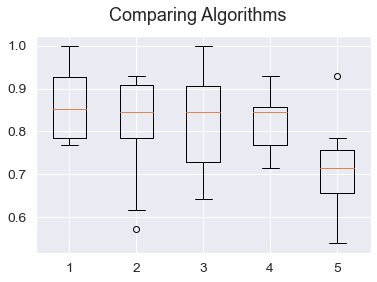

In [31]:
# Comparing Multiple algorithms with out applying feature scale.......

n_neighbors=5

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

# keeping all models in one list
models=[]
models.append(('LogisticRegression',LogisticRegression()))
models.append(('knn',KNeighborsClassifier(n_neighbors=n_neighbors)))
models.append(('SVC',SVC()))
models.append(("decision_tree",DecisionTreeClassifier()))
models.append(('Naive Bayes',GaussianNB()))

# Evaluating Each model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
names=[]
predictions=[]
error='accuracy'
for name,model in models:
    fold=KFold(n_splits=10,random_state=0)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    predictions.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    

# Visualizing the Model accuracy
fig=plt.figure()
fig.suptitle("Comparing Algorithms")
plt.boxplot(predictions)
plt.show()

**Observations :**

Prediction we got without applying feature scaling

* **Logistic Regression Classification Algorithm :** 0.868132 (0.084979)
* **K-Nearest Neighbors classification Algorithm :** 0.808242 (0.119180)
* **Support Vector Machine classification Algorithm :** 0.817033 (0.115752)
* **Decision Tree Classification Algorithm :** 0.837912 (0.044383)
* **Naive bayes Classification Algorithm :** 0.711538 (0.100122)


**Classification Models With Feature Scale**

LogisticRegression : 0.868132 (0.084979)
knn : 0.808242 (0.119180)
SVC : 0.817033 (0.115752)
decision_tree : 0.815934 (0.066810)
Naive Bayes : 0.711538 (0.100122)


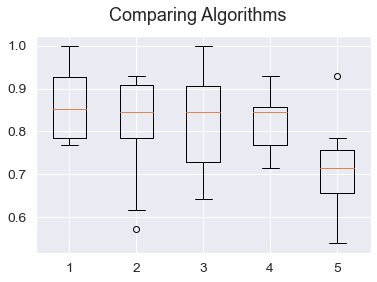

In [32]:
#Comparing Algorithms With StandardScaler Scaler

from sklearn.pipeline import Pipeline
from sklearn. preprocessing import StandardScaler
pipelines=[]
pipelines.append(('scaled Logisitic Regression',Pipeline([('scaler',StandardScaler()),('LogisticRegression',LogisticRegression())])))
pipelines.append(('scaled KNN',Pipeline([('scaler',StandardScaler()),('KNN',KNeighborsClassifier(n_neighbors=n_neighbors))])))
pipelines.append(('scaled SVC',Pipeline([('scaler',StandardScaler()),('SVC',SVC())])))
pipelines.append(('scaled DecisionTree',Pipeline([('scaler',StandardScaler()),('decision',DecisionTreeClassifier())])))
pipelines.append(('scaled naive bayes',Pipeline([('scaler',StandardScaler()),('scaled Naive Bayes',GaussianNB())])))

# Evaluating Each model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
names=[]
predictions=[]
for name,model in models:
    fold=KFold(n_splits=10,random_state=0)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    predictions.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    

# Visualizing the Model accuracy
fig=plt.figure()
fig.suptitle("Comparing Algorithms")
plt.boxplot(predictions)
plt.show()

**Observations :**

Prediction we got after applying feature scaling

* **Logistic Regression Classification Algorithm :** 0.868132 (0.084979)
* **K-Nearest Neighbors classification Algorithm :** 0.808242 (0.119180)
* **Support Vector Machine classification Algorithm :** 0.817033 (0.115752)
* **Decision Tree Classification Algorithm :** 0.837363 (0.097493)
* **Naive bayes Classification Algorithm :** 0.711538 (0.100122)


As per above accuracy we are going to pickup top 3 best performing algorithms for Regularisation Tunning

* Decision Tree Classification Algorithm
* Logistic Regression Classification Algorithm
* Support Vector Machine classification Algorithm

In [33]:
# Decision Tree Tunning Algorithms
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=StandardScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
param_grid=dict()
model=DecisionTreeClassifier()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.815934 using {} 


In [34]:
# Logistic Regression Tuning Algorithm
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=StandardScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
c=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
param_grid=dict(C=c)
model=LogisticRegression()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.853846 using {'C': 0.3} 


In [35]:
# SVC Tuning Algorithm
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=StandardScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
c=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
param_grid=dict(C=c)
model=SVC
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(SVC(),param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.869231 using {'C': 0.4} 


**Observations Post Tunnning:**


* Decision Tree Classification Algorithm Best: 0.859341 using {} 
* Logistic Regression Classification Algorithm Best: 0.853846 using {'C': 0.3}
* Support Vector Machine Algorithm Best : 0.869231 using {'C': 0.4} 

### Ensemble and Boosting Classification Algorithms With Feature Scale

scaledAB : 0.839560 (0.081896)
scaledGBC : 0.890659 (0.064707)
sacledBagging : 0.852747 (0.047253)
scaledRFC : 0.866484 (0.086704)
scaledETC : 0.897802 (0.046115)


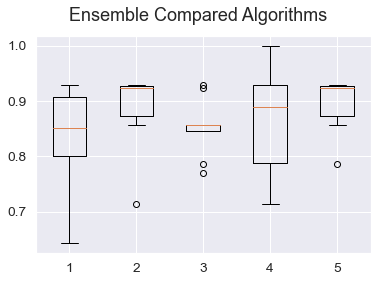

In [45]:
# Ensemble and Boosting algorithm to improve performance


#Ensemble
# Boosting methods
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Bagging methods
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
ensembles=[]
ensembles.append(('scaledAB',Pipeline([('scale',StandardScaler()),('AB',AdaBoostClassifier())])))
ensembles.append(('scaledGBC',Pipeline([('scale',StandardScaler()),('GBc',GradientBoostingClassifier())])))
ensembles.append(('sacledBagging',Pipeline([('scale',StandardScaler()),('BG',BaggingClassifier(n_estimators=10))])))
ensembles.append(('scaledRFC',Pipeline([('scale',StandardScaler()),('rf',RandomForestClassifier(n_estimators=10))])))
ensembles.append(('scaledETC',Pipeline([('scale',StandardScaler()),('ETC',ExtraTreesClassifier(n_estimators=10))])))

# Evaluate each Ensemble Techinique
results=[]
names=[]
for name,model in ensembles:
    fold=KFold(n_splits=10,random_state=5)
    result=cross_val_score(model,x_train,y_train,cv=fold,scoring=error)
    results.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    
# Visualizing the compared Ensemble Algorithms
fig=plt.figure()
fig.suptitle('Ensemble Compared Algorithms')
plt.boxplot(results)
plt.show()


**Observattions :**

* **AdaBoostClassifier :** 0.839560 (0.081896)
* **GradientBoostingClassifier :** 0.890659 (0.064707)
* **BaggingClassifier :** 0.852747 (0.047253)
* **RandomForestClassifier :** 0.866484 (0.086704)
* **ExtraTreesClassifier :** 0.897802 (0.046115)



As per above accuracy we are going to pickup top 2 best performing algorithms for Regularisation Tunning

* Gradient Boosting Classification Algorithm
* ExtraTreesClassifier Classification Algoriothm

In [49]:
# GradientBoosting ClassifierTuning

import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=StandardScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
n_estimators=[10,20,30,40,50,100,150,200,250,300]
learning_rate=[0.001,0.01,0.1,0.3,0.5,0.7,1.0]
param_grid=dict(n_estimators=n_estimators,learning_rate=learning_rate)
model=GradientBoostingClassifier()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.904945 using {'learning_rate': 0.7, 'n_estimators': 100} 


In [50]:
# Extra Trees Classifier Classifier Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
scaler=StandardScaler().fit(x_train)
rescaledx=scaler.transform(x_train)
n_estimators=[10,20,30,40,50,100,150,200]
param_grid=dict(n_estimators=n_estimators)
model=ExtraTreesClassifier()
fold=KFold(n_splits=10,random_state=5)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=error,cv=fold)
grid_result=grid.fit(rescaledx,y_train)

print("Best: %f using %s "%(grid_result.best_score_,grid_result.best_params_))

Best: 0.912088 using {'n_estimators': 20} 


**Observation Post Tunning:**

* Gradient Boosting Classification Algorithm Best: 0.904945 using {'learning_rate': 0.7, 'n_estimators': 100} 
* Extra Trees Classification Algoriothm Best: Best: 0.912088 using {'n_estimators': 20} 

**Comparing All the 5 Tuned Model Accuracy to finalize the best one :**

* Decision Tree Classification Algorithm Best: 0.859341 using {} 
* Logistic Regression Classification Algorithm Best: 0.853846 using {'C': 0.3}
* Support Vector Machine Algorithm Best : 0.869231 using {'C': 0.4} 
* Gradient Boosting Classification Algorithm Best: 0.904945 using {'learning_rate': 0.7, 'n_estimators': 100} 
* Extra Trees Classification Algoriothm Best: Best: 0.912088 using {'n_estimators': 20} 



**Extra Trees Classification Algoriothm Has High Accuracy while comparing to other tuned Model Results**

In [58]:
# Finalize Model
# Finalizing the Extra Trees Classification Algorithm 
# Evaluating model for Detection parkinsons disease

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
scaler=StandardScaler().fit(x_train)
scaler_x=scaler.transform(x_train)
model=ExtraTreesClassifier(n_estimators=30)
model.fit(scaler_x,y_train)

#Transform the validation test set data
scaledx_test=scaler.transform(x_test)
y_pred=model.predict(scaledx_test)
y_predtrain=model.predict(scaler_x)

### Accuracy of the Best Algorithm

In [59]:
accuracy_mean=accuracy_score(y_train,y_predtrain)
accuracy_matrix=confusion_matrix(y_train,y_predtrain)
print("train set",accuracy_mean)
print("train set matrix",accuracy_matrix)

accuracy_mean=accuracy_score(y_test,y_pred)
accuracy_matric=confusion_matrix(y_test,y_pred)
print("test set",accuracy_mean)
print("test set matrix",accuracy_matrix)

train set 1.0
train set matrix [[ 32   0]
 [  0 104]]
test set 0.9152542372881356
test set matrix [[ 32   0]
 [  0 104]]


**Observations :**

* For Training Data we got 100% Accuracy
* For the Test Data We got 91.5% as Accuracy

Based on the result the Model is Best Fit